In [1]:
#!conda install -y lxml

# Part One, Step One
The code below fulfills Part One, Step 1, 1-5. It imports the packages needed, and extracts the lxml from the website. At the end, it prints out the prettify version for display and later use.

In [2]:
import requests
import numpy
from bs4 import BeautifulSoup

#1.1.2 - 1.1.5
r = requests.get("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares", headers = {"User-Agent":"Chrome/85.0.4183.102"})
root = BeautifulSoup(r.content,"lxml")
#print(root.prettify()) #Commented out for submission

The following code will finish #'s 6-8. It will find the table elements, import the html into a new dataframe named df_table and set reasonable names for the columns.

In [3]:
#1.1.6
table = root.find("table")

#1.1.7
import pandas as pd
pd_table = pd.read_html(str(table))
df_table = pd_table[0] #Create the table dataframe 

# 1.1.8- Rename the columns
df_table.columns = ["rank", "x_class", "date", "region", "start_time", "max_time", "end_time", "movie"]
df_table.head()

,rank,x_class,date,region,start_time,max_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive


# Part One, Step Two
The following code will do all of Step 2. First, it drops the movie column. Next, it converts all the dates and times into datetime columns. Finally, it removes any unnecessary columns and renames the columns to from dates/times to datetimes. There are no NaN steps required.

In [4]:
#1.2.1- drop movie column
df_table = df_table.drop("movie", axis = 1)

#1.2.2 - 1.2.3
import datetime
for index, row in df_table.iterrows():
    #Extracts the Date
    start_date = row['date']
    start_date_obj = datetime.datetime.strptime(start_date, "%Y/%m/%d").date();
    
    #Extracts the Time
    start_time = row['start_time']
    start_time_obj = datetime.datetime.strptime(start_time, "%H:%M").time();
    
    max_time = row['max_time']
    max_time_obj = datetime.datetime.strptime(max_time, "%H:%M").time();
    
    end_time = row['end_time']
    end_time_obj = datetime.datetime.strptime(end_time, "%H:%M").time();
    
    #Combines the Date and Time into one datetime object
    combined_start_datetime = datetime.datetime.combine(start_date_obj, start_time_obj)
    df_table.at[index, 'date'] = combined_start_datetime
    
    combined_max_datetime = datetime.datetime.combine(start_date_obj, max_time_obj)
    df_table.at[index, 'max_time'] = combined_max_datetime
    
    combined_end_datetime = datetime.datetime.combine(start_date_obj, end_time_obj)
    df_table.at[index, 'end_time'] = combined_end_datetime
    
df_table.drop('start_time', axis=1)
df_table = df_table[['rank', 'x_class', 'date', 'max_time', 'end_time', 'region']]
df_table.columns = ["rank", "x_class", "start_datetime", "max_datetime", "end_datetime", "region"]
#1.2.4 isn't required because there is no NaN
df_table.head()

,rank,x_class,start_datetime,max_datetime,end_datetime,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415


# Part One, Step 3
The following code will get the NASA Data from the websites. It will go through all the html and organize all the data into a DataFrame named df. To do this, it first finds lines with a date at the beginning which marks the beginning of an entry. Then, using BeautifulSoup, it splits each html element's text into a list. Now, all the required information is inside a list and we append that to our data 2D array for conversion into the DataFrame.

In [5]:
#1.3.1
# Getting the html
r = requests.get("http://www.hcbravo.org/IntroDataSci/misc/waves_type2.html", headers = {"User-Agent":"Chrome/85.0.4183.102"})
root = BeautifulSoup(r.content,"lxml")
content = str(root.find("pre"))
#print(content)

# 1.3.2- Format the lxml into a usable structure for making the dataframe
import re
full_lines = content.split("\n")
lines = []
for l in full_lines:
    if re.match(r'\d{4}', l): #Check if the line starts with a date
        #print(l)
        soup = BeautifulSoup(l,"lxml")
        split = soup.find('p').get_text().split() #Split based on each html element
        extra = []
        if len(split) > 15: #If there's comments at the end, combine them into one section
            temp = ' '.join(split[15:])
            split = split[:15]
            split.append(temp)
        lines.append(split) #add them into the structure



df = pd.DataFrame(data = lines) #Create the dataframe
#Name the columns
df.columns = ['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region', 'flare_classification', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed', 'plot', 'comments']
#Remove the comments column because not needed
df = df.drop('comments', axis = 1)
df.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,plot
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX


# Part One, Step 4
Now that the NASA information is in the DataFrame df, we want to tidy it up. First, we replace any missing entries with NaN by targetting any permuation of '?', 'back', 'halo', and '-''s which signify missing data and enter 'NaN' and the entry. Also, we create two new bool columns called is_halo and width_lower_bound to denote whether an entry is a halo or has a lower bound for a width. Finally, we convert all the dates/times into datetime columns and clean up the columns by renaming them or dropping unnecessary ones.

In [6]:
#1.4.1
# Find missing entries and replace with NaN
# Targets ?, back, and -
for index, row in df.iterrows():
    for col in row.index:
        if row[col].lower().find("?") != -1 or row[col].lower().find("back") != -1 or row[col].lower().find("-") != -1:
            #print(row[0] + " " + col + " " + row[col])
            df.at[index, col] = 'NaN'
#df
# 1.4.2 Replacing Halo with NaN
df.insert(len(df.columns), 'is_halo', False)
for index, row in df.iterrows():
    if row['cme_angle'].lower() == 'halo':
        df.at[index, 'cme_angle'] = 'NaN'
        df.at[index, 'is_halo'] = True

# 1.4.3 Creating lower bound
df.insert(len(df.columns), 'width_lower_bound', False)
for index, row in df.iterrows():
    if not df.at[index, 'cme_width'].isdigit():
        
        #Check for lower bound
        if df.at[index, 'cme_width'][0] == '>':
            #print(index)
            df.at[index, 'width_lower_bound'] = True
            
        #Sanitize into numbers only or NaN
        if df.at[index, 'cme_width'] != 'NaN':
            temp = ""
            for char in df.at[index, 'cme_width']:
                if char.isdigit():
                    temp += char
            df.at[index, 'cme_width'] = temp
            
#1.4.4 Creating datetimes
for index, row in df.iterrows():
    good = [True, True, True]
    start_date = row['start_date']
    start_date_obj = datetime.datetime.strptime(start_date, "%Y/%m/%d").date();
    
    start_time = row['start_time']
    start_time_obj = datetime.datetime.strptime(start_time, "%H:%M").time();
    
    end_date = row['end_date']
    end_date_obj = datetime.datetime.strptime(end_date, "%m/%d").date().replace(year = start_date_obj.year);
    
    end_time = row['end_time']
    if end_time == '24:00':
        end_time = '00:00'
        end_date_obj += datetime.timedelta(days = 1)
    end_time_obj = datetime.datetime.strptime(end_time, "%H:%M").time();
    
    cme_date = row['cme_date']
    if cme_date == 'NaN':
        good[2] = False
    else:
        cme_date_obj = datetime.datetime.strptime(cme_date, "%m/%d").date().replace(year = start_date_obj.year);
    
    cme_time = row['cme_time']
    if cme_time == 'NaN':
        good[2] = False
    else:
        cme_time_obj = datetime.datetime.strptime(cme_time, "%H:%M").time();
    
    if good[0]:
        combined_start_datetime = datetime.datetime.combine(start_date_obj, start_time_obj)
        df.at[index, 'start_date'] = combined_start_datetime
    if good[1]:
        combined_end_datetime = datetime.datetime.combine(end_date_obj, end_time_obj)
        df.at[index, 'end_date'] = combined_end_datetime
    if good[2]:
        combined_cme_datetime = datetime.datetime.combine(cme_date_obj, cme_time_obj)
        df.at[index, 'cme_date'] = combined_cme_datetime
        
#Deleting unnecessary columns
df = df.drop('start_time', axis = 1)
df = df.drop('end_time', axis = 1)
df = df.drop('cme_time', axis = 1)

#Changing column names
#the *_date columns become *_datetime and classification becomes importance
df.columns = ['start_datetime', 'end_datetime', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region', 'importance', 'cme_datetime', 'cpa', 'width', 'speed', 'plot', 'is_halo', 'width_lower_bound']
#df.to_csv('nasa.csv') #Saves df as a csv file for debugging purposes
df.head()

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False


# Part 2, Question 1
In this Question, we want to see if we can replicate the top 50 Solar Flares from the SpaceWeatherLive website using the NASA data. However, this is not possible. Most entries are similar, however there are minor discrepancies as well as entirely missing entries in the NASA data.

Below, my code creates a new DataFrame that will have the entries sorted based on their importance/classification. If replication was possible, the first 50 entries in this dataframe should be similar to the df_table which we created earlier in the project which contains the top 50 Solar Flares. However, after inspecting the sorted data frame, it is clear that perfect replication is not possible.

In [7]:
# Question 1
# df_table has the top 50 from the SpaceWeatherLive website using code from Part 1.

#Creating a df with all X... type of classifications
entries = []
for index, row in df.iterrows():
    if row['importance'][0] == 'X':
        entries.append(row)
sorted_df = pd.DataFrame(data = entries) #df created. Not sorted yet

#Cleaning classifications by removing X and converting into floats
float_values = []
for index, row in sorted_df.iterrows():
    temp = row['importance']
    temp = temp[1:]
    #print(float(temp))
    float_values.append(float(temp))
# float_values

# Replacing importance column with the new floats
sorted_df['importance'] = float_values
# Sorting by floats
sorted_df = sorted_df.sort_values('importance', ascending = False)
sorted_df.head()

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound
242,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,28.0,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,False
119,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,20.0,2001-04-02 22:06:00,261,244,2505,PHTX,False,False
234,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,17.0,2003-10-28 11:30:00,NaN,360,2459,PHTX,True,False
128,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,14.0,2001-04-15 14:06:00,245,167,1199,PHTX,False,False
235,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,10.0,2003-10-29 20:54:00,NaN,360,2029,PHTX,True,False


# Part Two, Question 2
Below, my code attempts to reconcile the differences between the two datasets. It goes through the SpaceWeatherLive table and tries to find the best matching entry from the NASA Data. It accomplishes this in a few parts.

The first part below, goes through the Top 50 and matches if there's any similar entries within the NASA Data on 3 columns- the classifications, regions, and start_dates. It handles slight formatting errors too. Once it finishes going through the NASA Data for each entry of Top 50, it creates 2D arrays for each category. The 2D arrays are formed like this: array[Top 50 Entry][Series of matching rows from NASA Data].

In [8]:
# Part 2 Question 2: Integration

# Matching on classifcations
class_matches = []
for index, rows in df_table.iterrows():
    temp = ''
    for char in rows['x_class']:
        if char.isnumeric() or char == '.':
            temp += char
    temp = float(temp)
    temp_matches = []
    for index2, rows2 in sorted_df.iterrows():
        if abs(rows2['importance'] - temp) < 0.5:
            temp_matches.append(rows2)
    class_matches.append(temp_matches)
    #class_matches.append(sorted_df[abs(sorted_df['importance'] - temp) < 0.5])

#Matching on region
region_matches = []
for index, rows in df_table.iterrows():
    region = str(rows['region'])
    matching_regions = []
    for index2, rows2 in sorted_df.iterrows():
        nasa_region = str(rows2['flare_region'])
        if region == nasa_region[-len(region):]:
            #print(region + " " + nasa_region + " " + nasa_region[-len(region):])
            matching_regions.append(rows2)
    #print(len(matching_regions))
    region_matches.append(matching_regions)
     
#Matching on start_date
date_matches = []
for index, rows in df_table.iterrows():
    date = rows['start_datetime']
    temp_matches = []
    for index2, rows2 in df.iterrows(): #use df to get the whole nasa set
        nasa_date = rows2['start_datetime']
        if (nasa_date > date):
            delta = nasa_date - date
        else:
            delta = date - nasa_date
        if (delta.days <= 1):
            temp_matches.append(rows2)
            #print(divmod(delta.seconds, 3600))
    #print(len(temp_matches))
    date_matches.append(temp_matches)
     
    
# Filter through dates first.
#print(len(interest))

Now, comes the actual processing of the data. The code creates a list named used to keep track of which entries have already been claimed so there's no repeats in the Top 50. 

Then, it creates dataframes based on the 2D lists made previously. Going through each entry of the NASA Data, it counts how many times an entry appears in each of the DataFrames. If an entry appears 3 times, it is highly likely that this entry corresponds with a Top 50 since it matches all the start_dates, regions, and classifications. If an entry appears 2 times, it is likely that there is a match. However, if an entry appears just once, it is hard to say if there is a match or not. In the event that there are multiple potential matches, the code will just pick the first one that is seen.

Now, if there are no matches at all, that means the Top 50 entry doesn't have any matching entry in the NASA Data at all. Thus, my code just assigns it the first unmatched entry from the NASA table starting from the beginning. For instance, if entries 1-3 were already claimed by previous Top 50 entries, then entry #4 will be the claimed entry for the current Top 50 entry assuming there is no good match for it.

At the end of the code, it created a SpaceWeatherLive_Ranking category and inputs 'NaN' if there's no matching entry and the ranking number if there is one.

In [9]:
used = []
for myIndex in range(50):
    #print(myIndex)
    date_df = pd.DataFrame(date_matches[myIndex])
    region_df = pd.DataFrame(region_matches[myIndex])
    class_df = pd.DataFrame(class_matches[myIndex])
    selection = [[],[],[]]
    
    for index in df.index:
        count = 0
        if index in date_df.index:
            count = count + 1
        if index in region_df.index:
            count = count + 1
        if index in class_df.index:
            count = count + 1
        if not (index in used):
            if (count == 3):
                selection[2].append(index)
            elif count == 2:
                selection[1].append(index)
            elif count == 1:
                selection[0].append(index)
        #if myIndex == 44 and index == 14:
        #    print(date_df)
        #    print(region_df)
        #    print(class_df)

    #print(used)
    if len(selection[2]) > 0:
        used.append(selection[2][0])
    elif len(selection[1]) > 0:
        used.append(selection[1][0])
    elif len(selection[0]) > 0:
        used.append(selection[0][0])
    else:
        used.append(-1)
        #print(date_df)
        #print(region_df)
        #print(class_df)

        # Go through each SpaceWeatherEntry and find similar values in 3 categories- date, region, and classification
        # Check if there's common entries in those categories. If so, then the entry with the most matches is it.
        # Otherwise, there's only 1 category that matches, so pick the first matching entry in that category.
        # Now, if there's no matches at all in any categories, just assign the first entries in the NASA data.
        # So entries on the SpaceWeather table that aren't in the NASA table at all are assigned to the next available
        # entry in the NASA data that isn't ranked yet.
df.insert(len(df.columns), 'SpaceWeatherLive_Ranking', 'NaN')
for i in range(len(used)):
    if used[i] == -1:
        for j in df.index:
            if j not in used:
                used[i] = j
                
#print(len(used))
for i in range(50):
    #print("index: ", i, " ", df_table.iloc[i,:])
    #print(df.iloc[used[i],:])
    df.at[used[i],'SpaceWeatherLive_Ranking'] = str(i)
    #print()
    #print()
df


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound,SpaceWeatherLive_Ranking
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False,NaN
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False,NaN
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False,NaN
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False,NaN
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2014-12-13 14:27:00,2014-12-13 14:51:00,14000,3900,W90b,NaN,NaN,2014-12-13 14:24:00,NaN,360,2222,PHTX,True,False,NaN
478,2014-12-17 04:09:00,2014-12-17 04:19:00,2900,2100,S11E33,12241,M1.1,2014-12-17 02:00:00,107,108,869,PHTX,False,False,NaN
479,2014-12-17 05:00:00,2014-12-17 05:09:00,14000,11500,S20E09,12242,M8.7,2014-12-17 05:00:00,NaN,360,587,PHTX,True,False,23
480,2014-12-18 22:31:00,2014-12-18 22:54:00,5100,1300,S11E15,12241,M6.9,2014-12-19 01:04:00,NaN,360,1195,PHTX,True,False,15


# Part Two, Question Three
My plot is designed to show all the Solar Flare speeds and how the Top 50 Solar Flare Speeds are related. It is aimed to answer the question: Will the Top 50 Solar Flares have the fastest speeds?

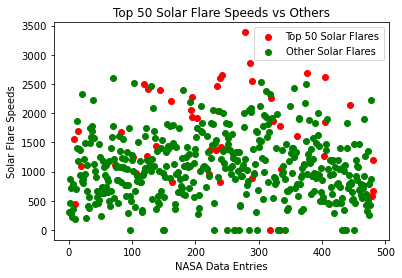

In [10]:
import matplotlib.pyplot as plt

# Create a df based on the Top 50 using the SpaceWeatherLive_Ranking Column.
top_df = df[df['SpaceWeatherLive_Ranking'] != 'NaN']
top_indices = []
top_speeds = []
# Convert all the entries from Strings into ints for plotting use
for index,row in top_df.iterrows():
    val = top_df.at[index, 'speed']
    top_indices.append(int(index))
    if val == 'NaN':
        top_speeds.append(0)
    else:
        top_speeds.append(int(val))
# Plot the points using x as their index in the NASA data and y = their speed
# The Top 50 will be plotted as red.
plt.scatter(top_indices, top_speeds, color = 'red')


#Create a df of the rest of the NASA data using the same column.
bot_df = df[df['SpaceWeatherLive_Ranking'] == 'NaN']
bot_indices = []
bot_speeds = []

#Convert all the entries into ints
for index,row in bot_df.iterrows():
    val = bot_df.at[index, 'speed']
    bot_indices.append(int(index))
    if val == 'NaN':
        bot_speeds.append(0)
    else:
        bot_speeds.append(int(val))
        
#Plot the entries with x = index in NASA data, y = speed, and color = green
plt.scatter(bot_indices, bot_speeds, color = 'green')

#Set up the labels and legends
plt.ylabel("Solar Flare Speeds")
plt.xlabel("NASA Data Entries")
plt.title("Top 50 Solar Flare Speeds vs Others")
plt.legend(['Top 50 Solar Flares', 'Other Solar Flares'])

plt.show()


This plot shows all the entries in the NASA Data and their speed values. The X-Axis is the entry number and the Y-Axis is the speeds. Red dots are the Top 50 Solar Flare entries while the green dots are the remaining entries.

In terms of variance, the speeds of each entry vary widely, ranging from close to 0 upwards to 3500. Meanwhile there seems to be a slight covariance with the Top 50 Solar Flares slightly occupying more of the higher speeds than the Other flares. Thus, the Top 50 Solar Flares could have a slightly higher average speed than the other flares.